In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(r"fashion_mnist/fashion-mnist_train.csv", sep=',')
test_df = pd.read_csv(r"fashion_mnist/fashion-mnist_test.csv", sep=',')


In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
import keras

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [8]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

In [9]:
x_train = train_data[:, 1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

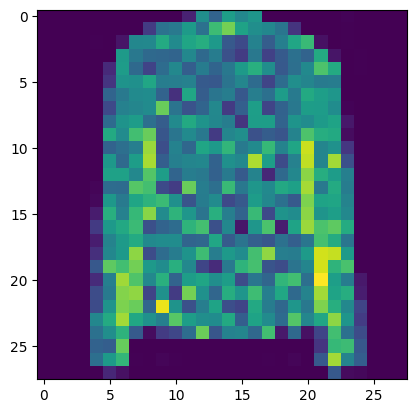

In [11]:
image = x_train[65,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [12]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows, image_cols, 1)

In [13]:
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_val = x_val.reshape(x_val.shape[0], *image_shape)

In [14]:
#Define the model

In [14]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape= image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape= image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='Flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '3_Layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape= image_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu',  name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu',  name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='Flatten'),
    Dense(10, activation='softmax', name='Output')
], name=name)


cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]


In [15]:
for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 MaxPool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 Dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 Dense (Dense)               (None, 32)                173088    
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainab

In [ ]:
history_dict = {}
for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_val, y_val)
        
    )
    
    history_dict[model.name] = history

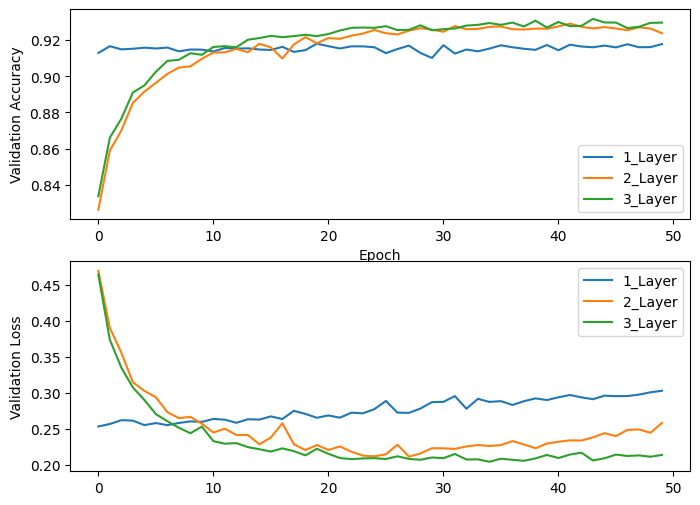

In [42]:
fig, (ax1, ax2)= plt.subplots(2, figsize= (8,6))
for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax1.set_xlabel('Epoch')
ax1.legend()
ax2.legend()
plt.show()